# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">  Prompt Engineering for Instruction-Tuned LLM: Text Summarization & Information Retrieval </center>
***


In today's fast-paced world, we're inundated with an overwhelming amount of text, leaving little time to read everything we desire. A fascinating application of large language models is their use in text summarization and information retrieval. 
Multiple teams are incorporating this feature into various software applications, including the chatGPT web interface. You can utilize LLM to summarize articles, enabling you  to consume the content of numerous articles more efficiently. If you're interested in a more programmatic approach, this article provides guidance on how to achieve that using prompt engineering.

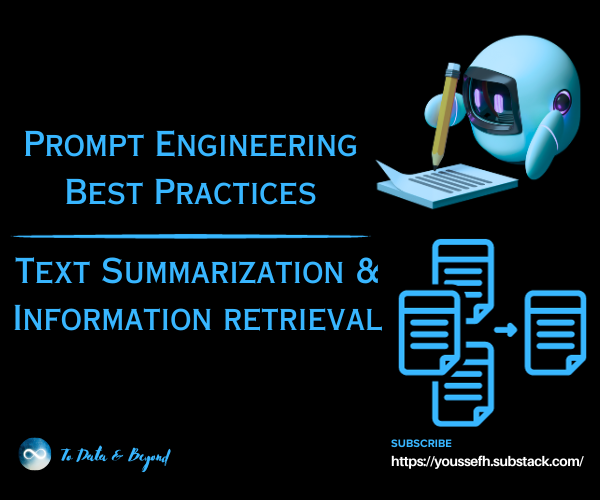

#### <a id="top"></a>

# <div style="box-shadow: rgb(60, 121, 245) 0px 0px 0px 3px inset, rgb(255, 255, 255) 10px -10px 0px -3px, rgb(31, 193, 27) 10px -10px, rgb(255, 255, 255) 20px -20px 0px -3px, rgb(255, 217, 19) 20px -20px, rgb(255, 255, 255) 30px -30px 0px -3px, rgb(255, 156, 85) 30px -30px, rgb(255, 255, 255) 40px -40px 0px -3px, rgb(255, 85, 85) 40px -40px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(60, 121, 245);"><b>Table of contents</b></div>

<div style="background-color: rgba(60, 121, 245, 0.03); padding:30px; font-size:15px; font-family: consolas;">
<ul>
    <li><a href="#1" target="_self" rel=" noreferrer nofollow">1. Setting Working Environment & Getting Started </a> </li>
    <li><a href="#2" target="_self" rel=" noreferrer nofollow">2. Summarize with Specific Purpose </a></li>
    <li><a href="#3" target="_self" rel=" noreferrer nofollow">3.  Information Retrieval </a></li> 
    <li><a href="#4" target="_self" rel=" noreferrer nofollow">4. Summarize Multiple Texts </a></li>
    
</ul>
</div>

***


<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 1. Setting Working Environment & Getting Started </b></div>


We will use the OpenAI Python library to access the OpenAI API. You can this Python library using pip like this:
    

In [1]:
!pip install openai

  Obtaining dependency information for openai from https://files.pythonhosted.org/packages/f1/d8/590a68d390501faf48f4e57b098076df02afd003ac880f50d3b0704f7773/openai-1.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for httpx<1,>=0.23.0 from https://files.pythonhosted.org/packages/39/9b/4937d841aee9c2c8102d9a4eeb800c7dad25386caabb4a1bf5010df81a57/httpx-0.26.0-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions<5,>=4.7 from https://files.pythonhosted.org/packages/b7/f4/6a90020cd2d93349b442bfcb657d0dc91eee65491600b2cb1d388bc98e6b/typing_extensions-4.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for httpcore==1.* from https://files.pythonhosted.org/packages/56/ba/78b0a99c4da0ff8b0f59defa2f13ca4668189b134bd9840b6202a93d9a0f/httpcore-1.0.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.9 MB/s eta 0:00:00
   ━━

Next, we will import OpenAI and then set the OpenAI API key which is a secret key. You can get one of these API keys from the OpenAI website. It is better to set this as an environment variable to keep it safe if you share your code. We will use OpenAI's chatGPT GPT 3.5 Turbo model, and the chat completions endpoint.

In [2]:
from openai import OpenAI
import openai
import os
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()
openai.api_key = user_secrets.get_secret("openai_api")
client = OpenAI(
    # This is the default and can be omitted
    api_key=openai.api_key,
)


Finally, we will define a helper function to make it easier to use prompts and look at generated outputs. So that's this function, getCompletion, that just takes in a prompt and will return the completion for that prompt.

In [3]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content


Let's start with an example of the task of summarizing a movie  review. If you're building a movie streaming website, and there's just a large volume of reviews, having a tool to summarize the lengthy reviews could give you a way to very quickly glance over more reviews to get a better sense of what all your customers are thinking.

In [4]:
movie_review = """
Watched this movie over the weekend, and it turned out to be a delightful cinematic experience. The storyline was engaging, weaving together various plot elements seamlessly. The characters were well-developed, and their interactions felt genuine. The film had a perfect blend of drama, humor, and suspense, keeping me hooked from start to finish.

The visuals were stunning, with impressive cinematography that added depth to the narrative. The special effects were top-notch, enhancing the overall viewing experience. The soundtrack was also noteworthy, complementing the on-screen action and evoking the right emotions at the right moments.

Despite these strengths, there were a few drawbacks. Some scenes felt a bit rushed, leaving me wanting more in terms of character development. Additionally, the ending seemed a tad predictable, lacking the surprise factor that could have elevated the film to greater heights.

On the positive side, the movie was a bit of a hidden gem, exceeding my expectations. The pacing was well-managed, and the runtime felt just right. It left me with a sense of satisfaction, much like finding a surprise extra feature on a DVD.

In conclusion, this film is worth a watch for its compelling story, impressive visuals, and engaging characters. While it may not be a groundbreaking masterpiece, it certainly provides an enjoyable and entertaining escape into its cinematic world.

"""

This is a very long review so let's write a prompt to summarize this review in less than 30 words only.

In [5]:
prompt = f"""
Your task is to generate a short summary of a movie \
review from a streaming service. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words. 

Review: ```{movie_review}```
"""

response = get_completion(prompt)
print(response)

This movie is a delightful cinematic experience with engaging storytelling, well-developed characters, and a perfect blend of drama, humor, and suspense. The visuals and special effects are stunning, and the soundtrack complements the action. However, some scenes feel rushed and the ending is predictable. Overall, it's a hidden gem that provides an enjoyable escape into its cinematic world.


It's a good summary although it seems a little bit longer than 30 words but it is still acceptable. You can also change  the character count or the number of sentences to affect the length of this summary. Sometimes when creating a summary, if you have a very specific purpose in mind for the summary. Let's see how we can do this.

<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 2. Summarize with Specific Purpose  </b></div>



If you want to give feedback to a specific  department or to get feedback on a specific movie criteria, you can modify the prompt to reflect that, so that they can generate a summary that is more applicable to one particular group in your business. 
So, for example, I add to get feedback on the movie's ending sequence to enhance the movie recommendation system. I will change the prompt to start focusing on any aspects that mention the movie's ending sequence.

In [6]:
prompt = f"""
Your task is to extract relevant information from \ 
a movie review from a streaming service to give to the recommendation engine \

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on  \
how the watcher felt about the movie sequence ending.

Review: ```{movie_review}```
"""

response = get_completion(prompt)
print(response)

The watcher found the movie to be a delightful cinematic experience with engaging storyline, well-developed characters, and a perfect blend of drama, humor, and suspense. The visuals and special effects were stunning, and the soundtrack was noteworthy. However, some scenes felt rushed and the ending was predictable, lacking surprise. Overall, the movie exceeded expectations and left the watcher satisfied.


Again you get a summary and it now focuses on the fact that the ending sequence was rushed and the predictable and lacking surpirse.
Let's take another example. Let's say we want to get feedback on the character's development and how far the watcher engaged with them. I'm going to tell it to focus on any aspects that are relevant to the characters

In [7]:
prompt = f"""
Your task is to extract relevant information from \ 
a movie review from a streaming service to give the recommendation engine \

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing how the watcher\
feels about the movie characters. 

Review: ```{movie_review}```
"""

response = get_completion(prompt)
print(response)

The watcher feels that the movie characters are well-developed and their interactions feel genuine. The characters are engaging and contribute to an enjoyable and entertaining cinematic experience.


You can try to summarize based on other aspects of the movie and see how it works.

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3. Information Retrieval </b></div>


In the previous summaries, even though it generated the information relevant to the ending sequence we can see that it had some other information too, which you could decide may or may not be helpful. So, depending on how you want to summarize it, you can also ask it to extract information rather than summarize it.
So here's a prompt that says your  task is to extract relevant information to about the movie's ending sequence.

In [8]:
prompt = f"""
Your task is to extract relevant information from \ 
a movie review from a streaming service.

From the review below, delimited by triple quotes \
extract the information relevant to ending sequence \ 
Limit to 30 words. 

Review: ```{movie_review}```
"""

response = get_completion(prompt)
print(response)

The ending seemed predictable, lacking surprise factor that could have elevated the film to greater heights.


This can be used as an information retrieval model which is a complex NLP task. Now you can do it in a very simple way using only prompt engineering.

<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 4. Summarize Multiple Texts  </b></div>


Lastly, let's take a concrete example of how to use this in a workflow to help summarize multiple reviews to make them easier to read. 
So, here are four movie reviews and we will use the prompt to summarize each of them.

In [9]:
review_1 = movie_review 

# review for moview 2
review_2 = """
I was completely immersed in this cinematic gem! 
The storytelling is so engaging, and the characters feel like old friends. 
The mix of drama, humor, and suspense had me hooked throughout. 
Visually, it's a feast for the eyes with stunning effects, and the 
soundtrack added so much emotion. Sure, the ending was a bit expected, 
but the overall experience was so enjoyable that I highly recommend giving 
it a watch
"""

# review for movie 3
review_3 = """
What a journey! I felt like I was right there with 
the characters in this film. The storytelling is fantastic, and the 
characters are so well-developed that I genuinely cared about their fates. 
The blend of drama, humor, and suspense kept me entertained, 
and the visuals were breathtaking. Despite a few rushed scenes, 
I found myself thoroughly enjoying this movie. 
It's definitely worth your time.
"""

# review for movie 4
review_4 = """
I had a blast watching this film! The storytelling drew me in, 
and the characters were so relatable. The perfect mix of drama, humor, 
and suspense made it a rollercoaster of emotions. Visually, it's stunning, 
and the soundtrack added an extra layer of excitement. 
While the ending wasn't a huge surprise, 
the overall experience left me thoroughly entertained. 
If you're looking for a fun and engaging movie night, 
this one's a solid choice.
"""

reviews = [review_1, review_2, review_3, review_4]

This is a lot of text. But what if you want to know what these reviewers wrote without having to stop and read all this in detail? So, I'm going to set review one to be just the movie review that we had up there. And I'm going to put all of these reviews into a list. And now, if I implement or loop over the reviews, so, here's my prompt. And here I've asked it to summarize it in at most 20 words. Then let's have it get the response and print it out. And let's run that.

In [10]:
for i in range(len(reviews)):
    prompt = f"""
    Your task is to extract relevant information from \ 
    a movie review from a streaming service.
    
    Summarize the review below, delimited by triple \
    backticks in at most 20 words. 

    Review: ```{reviews[i]}```
    """

    response = get_completion(prompt)
    print(i, response, "\n")

0 The movie is a delightful cinematic experience with engaging storyline, well-developed characters, and a perfect blend of drama, humor, and suspense. The visuals, special effects, and soundtrack are impressive. However, some scenes felt rushed and the ending was predictable. Overall, it is worth watching for its compelling story and impressive visuals. 

1 The reviewer highly recommends this engaging and visually stunning movie with a predictable ending. 

2 The reviewer enjoyed the film's storytelling, well-developed characters, blend of drama, humor, and suspense, and breathtaking visuals. 

3 This film is a thrilling rollercoaster of emotions with relatable characters, stunning visuals, and an exciting soundtrack. 



If you have any applications with long pieces of text, you can use prompts like these to summarize them and get information out of them to help people quickly understand the text and perhaps optionally dig in more if they wish. 
In the next article, we'll look at another capability of large language models, which is to make inferences using text. For example, what if you had, again, movie reviews and you wanted to very quickly get a sense of which movie reviews have a positive or negative sentiment or do sentiment analysis of the movie reviews?

<a id="6"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 6. References  </b></div>

* [ChatGPT Prompt Engineering for Developers](https://www.deeplearning.ai/short-courses/chatgpt-prompt-engineering-for-developers/)


# <div style="box-shadow: rgba(240, 46, 170, 0.4) -5px 5px inset, rgba(240, 46, 170, 0.3) -10px 10px inset, rgba(240, 46, 170, 0.2) -15px 15px inset, rgba(240, 46, 170, 0.1) -20px 20px inset, rgba(240, 46, 170, 0.05) -25px 25px inset; padding:20px; font-size:30px; font-family: consolas; display:fill; border-radius:15px; color: rgba(240, 46, 170, 0.7)"> <b> ༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ Thank You!</b></div>

<p style="font-family:verdana; color:rgb(34, 34, 34); font-family: consolas; font-size: 16px;"> 💌 Thank you for taking the time to read through my notebook. I hope you found it interesting and informative. If you have any feedback or suggestions for improvement, please don't hesitate to let me know in the comments. <br><br> 🚀 If you liked this notebook, please consider upvoting it so that others can discover it too. Your support means a lot to me, and it helps to motivate me to create more content in the future. <br><br> ❤️ Once again, thank you for your support, and I hope to see you again soon!</p>